In [1]:
from surprise import Dataset
from surprise.prediction_algorithms.matrix_factorization import SVD, SVDpp
from adjustText import adjust_text
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names = ["Movie Id", "Movie Title", "Unknown", "Action", "Adventure", "Animation", "Childrens", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", 
         "Thriller", "War", "Western"]
movies = pd.read_csv('../data/movies.txt', delimiter='\t', header=None, encoding='UTF-8', names=names)

In [3]:
data = Dataset.load_builtin('ml-100k')

In [4]:
ts = data.build_full_trainset()

In [58]:
svd = SVD(n_factors=2, biased=False, n_epochs=100)
# svd = SVD(n_factors=2, n_epochs=100)
# svd = SVDpp(n_factors=2)

In [59]:
svd.fit(ts)

In [7]:
svd.qi.shape

(1682, 2)

In [8]:
action_idx = movies[movies['Action']==1].index.values
romance_idx = movies[movies['Romance']==1].index.values
other_idx = movies[movies['Action']!=1].index.values
target_idx = movies[(movies['Action']==1) & (movies['Romance']==1)].index.values

In [9]:
scores = np.array(list(map(lambda x: np.average([v for _,v in x]), ts.ir.values())))
# scores = np.array([np.average([v for _,v in ts.ir[ts.to_inner_iid(str(i))]]) for i in range(1, len(movies) + 1)])

In [10]:
num_scores = np.array(list(map(lambda x: len(x), ts.ir.values())))
# num_scores = np.array([len(ts.ir[ts.to_inner_iid(str(i))]) for i in range(1, len(movies) + 1)])

In [11]:
years = np.array(movies['Movie Title'].str.extract('\((\d*)\)').values)

C:\Users\Veniversum\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [29]:
titles = np.array(movies['Movie Title'].values)

In [61]:
annotated_movies = [(50, 'Star Wars (1977)'),
                    (127, 'The Godfather (1972)'),
                    (98, 'Silence of the Lambs (1991)'),
                    (313, 'Titanic (1997)'),
                    (69, 'Forrest Gump (1994)'),
                    (168, 'Monty Python and the Holy Grail (1974)'),
                    (1, 'Toy Story (1995)'),
#                     (475, 'Trainspotting (1996)'),
#                     (475, 'Trainspotting (1996)'),
                   ]

annotated_movies2 = [(257.0, 'Men in Black (1997)'),
 (69.0, 'Forrest Gump (1994)'),
 (172.0, '"Empire Strikes Back, The (1980)"'),
 (300.0, 'Air Force One (1997)'),
 (174.0, 'Raiders of the Lost Ark (1981)'),
 (173.0, '"Princess Bride, The (1987)"'),
 (79.0, '"Fugitive, The (1993)"'),
 (748.0, '"Saint, The (1997)"'),
 (50.0, 'Star Wars (1977)'),
 (210.0, 'Indiana Jones and the Last Crusade (1989)'),
 (237.0, 'Jerry Maguire (1996)'),
 (405.0, 'Mission: Impossible (1996)'),
 (181.0, 'Return of the Jedi (1983)'),
 (117.0, '"Rock, The (1996)"'),
 (313.0, 'Titanic (1997)'),
 (222.0, 'Star Trek: First Contact (1996)'),
 (121.0, 'Independence Day (ID4) (1996)'),
 (286.0, '"English Patient, The (1996)"'),
 (127.0, '"Godfather, The (1972)"')]

star_trek = [(222, 'Star Trek: First Contact (1996)'),
                    (227, 'Star Trek VI: The Undiscovered Country (1991)'),
                    (228, 'Star Trek: The Wrath of Khan (1982)'),
                    (229, 'Star Trek III: The Search for Spock (1984)'),
                    (230, 'Star Trek IV: The Voyage Home (1986)'),
                    (380, 'Star Trek: Generations (1994)'),
                    (449, 'Star Trek: The Motion Picture (1979)'),
                    (450, 'Star Trek V: The Final Frontier (1989)'),
#                     (475, 'Trainspotting (1996)'),
                   ]

outlier_idx = [int(ts.to_raw_iid(i))-1 for i in np.where(np.linalg.norm(svd.qi, axis=1) > 1000)[0]]
popular_idx = [int(ts.to_raw_iid(i))-1 for i in np.where(num_scores > 350)[0]]
annotate_outliers = movies[['Movie Id', 'Movie Title']].values[np.unique(outlier_idx + popular_idx)]

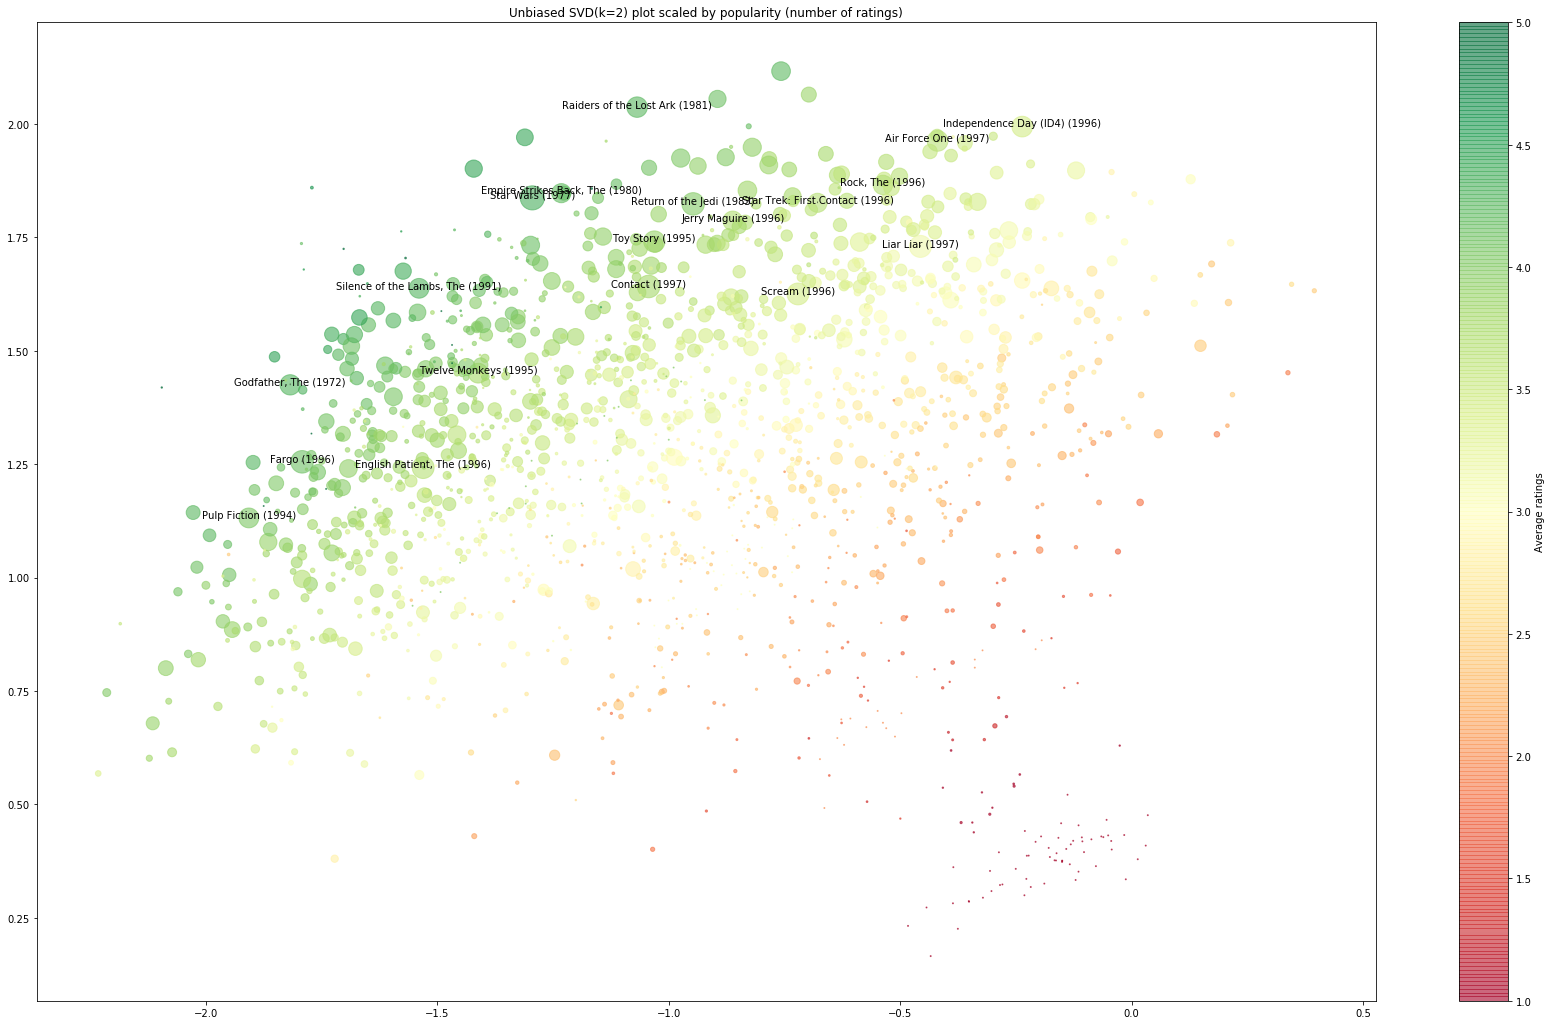

In [62]:
plt.figure(figsize=(30,18))
plt.scatter(*svd.qi.T, c=scores, s=num_scores, cmap=plt.get_cmap('RdYlGn'), alpha=0.6)
plt.colorbar().set_label("Average ratings")
plt.title("Unbiased SVD(k=2) plot scaled by popularity (number of ratings)")
texts = []
for movie_id, name in annotate_outliers:
    iid = ts.to_inner_iid(str(int(movie_id)))
    texts.append(plt.annotate(name, xy=svd.qi[iid], horizontalalignment='center', textcoords='offset points', 
                              xytext=(0, 0), arrowprops=dict(arrowstyle='-', lw=1, alpha=0.5)))
# adjust_text(texts)
# plt.scatter(*svd.qi[target_idx].T, c='red', s=3)

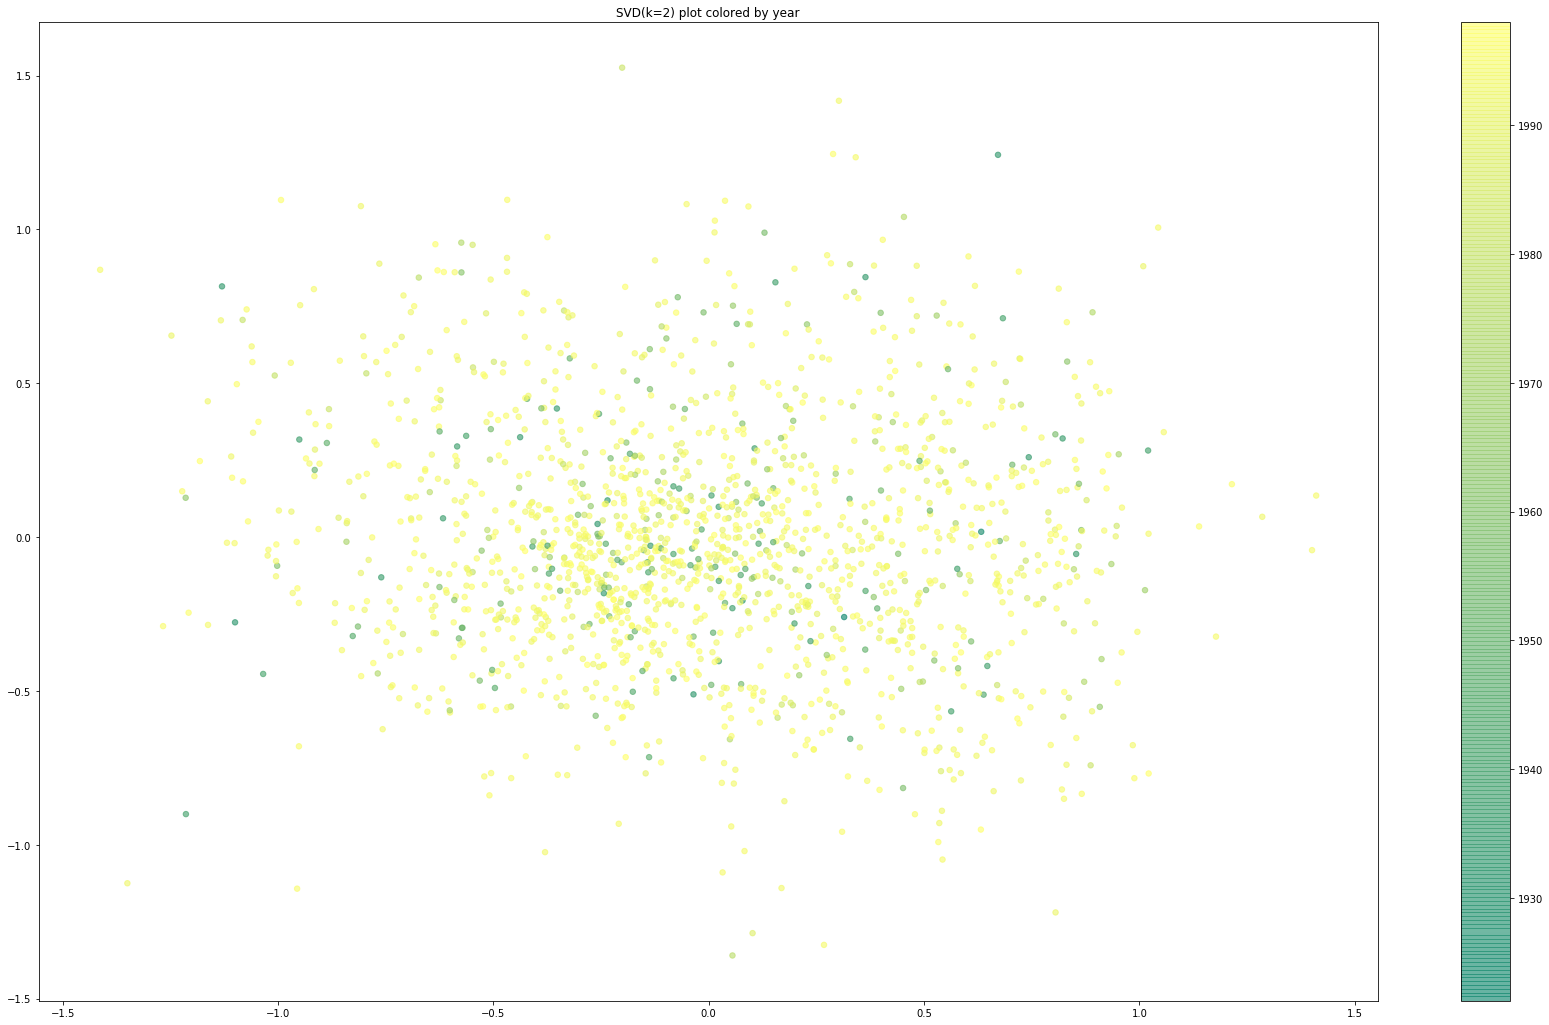

In [17]:
plt.figure(figsize=(30,18))
plt.scatter(*svd.qi.T, c=years, s=30, cmap=plt.get_cmap('summer'), alpha=0.6)
plt.title("SVD(k=2) plot colored by year")
plt.colorbar()

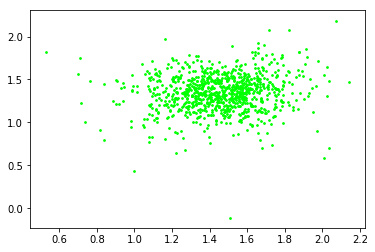

In [53]:
# plt.scatter(*svd.qi[other_idx].T, c='lightgray', s=3)
# plt.scatter(*svd.qi[action_idx].T, c='blue', s=3)
# plt.scatter(*svd.qi[romance_idx].T, c='red', s=3)
plt.scatter(*svd.pu.T, c='lime', s=3)

In [181]:
movies

,Movie Id,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [64]:
movies[['Movie Id', 'Movie Title']].values

array([[1, 'Toy Story (1995)'],
       [2, 'GoldenEye (1995)'],
       [3, 'Four Rooms (1995)'],
       ...,
       [1680, 'Sliding Doors (1998)'],
       [1681, 'You So Crazy (1994)'],
       [1682, 'Scream of Stone (Schrei aus Stein) (1991)']], dtype=object)

In [87]:
[int(ts.to_raw_iid(i))-1 for i in np.where(np.linalg.norm(svd.qi, axis=1) > 1)[0]]

[143, 173, 194, 116, 171, 126, 55, 285, 49, 120, 299, 242, 275]

In [84]:
    np.where(np.linalg.norm(svd.qi, axis=1) > 1)[0]

array([ 22, 101, 112, 140, 161, 189, 216, 289, 357, 403, 652, 668, 695],
      dtype=int64)

In [28]:
sim_mat = svd.compute_similarities()

Computing the msd similarity matrix...
Done computing similarity matrix.


,Movie Id,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as mcolors

norm = mpl.colors.Normalize(vmin=1, vmax=5)
cmap = cm.RdYlGn
x = 0.3

m = cm.ScalarMappable(norm=norm, cmap=cmap)
mcolors.to_hex(m.to_rgba(2))

'#f98e52'

In [32]:
from collections import defaultdict
movie_data = defaultdict(dict)

In [72]:
for i in range(1682):
    movie_id = str(i+1)
    iid = ts.to_inner_iid(movie_id)
    xy = svd.qi[iid].tolist()
    movie_data[movie_id]['color'] = mcolors.to_hex(m.to_rgba(scores[iid]))
#     movie_data[movie_id]['title'] = titles[i]
#     movie_data[movie_id]['svdu'] = xy

    movie_data[movie_id]['count'] = num_scores[iid]
    movie_data[movie_id]['rating'] = scores[iid]

In [73]:
import json
with open('../data.json', 'w') as f:
    json.dump(list(movie_data.values()), f, cls=MyEncoder)

In [63]:
movie_data['1']

{'color': '#87cb67',
 'count': 117,
 'rating': 3.9914529914529915,
 'svd': [0.029645598508749968, -0.341932918205704],
 'svdpp': [-0.2219937210032763, 0.3768941798311405],
 'svdu': [0.9215072464510764, 1.8065711594189904],
 'title': 'Toy Story (1995)'}

In [70]:
iid = ts.to_inner_iid('1')

In [71]:
svd.qi[iid]

array([-1.03140716,  1.74091327])

In [52]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)